# Differentiating the PPG signal
Differentiating the PPG signal is a key step in identifying fiducial points on PPG pulse waves.

---
## Specify an ICU stay and segment

<div class="alert alert-block alert-warning"> <b>Resource:</b> These steps are taken from the <a href="https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/data-visualisation.html">Data Visualisation</a> tutorial. </div>

- Specify the required Python packages

In [1]:
import sys
import wfdb

- Get a list of ICU stays in the database

In [2]:
database_name = 'mimic3wdb/1.0' # The name of the MIMIC III Waveform Database on Physionet (see URL: https://physionet.org/content/mimic3wdb/1.0/)
icustay_records = wfdb.get_record_list(database_name)
print("There are {} ICU stays in the database".format(len(icustay_records)))

There are 67830 ICU stays in the database


- Specify an ICU stay

In [49]:
icustay_no = 10 # specify the first record (noting that in Python the first index is 0)
icustay_record = icustay_records[icustay_no]
icustay_record_dir = database_name + '/' + icustay_record
icustay_record_name = icustay_record.split("/")[1]
print("Specified ICU stay: {}".format(icustay_record_name))

Specified ICU stay: 3000125


- Specify a segment of this ICU stay

In [54]:
icustay_files = wfdb.get_record_list(icustay_record_dir)
icustay_segments = [s for s in icustay_files if "_" in s]
icustay_segment_no = 4;
icustay_segment_name = icustay_segments[icustay_segment_no]
print("Specified segment: '{}' within ICU stay '{}'".format(icustay_segment_name, icustay_record_name))

Specified segment: '3000125_0005' within ICU stay '3000125'


---
## Extract data for this segment
<div class="alert alert-block alert-warning"> <b>Resource:</b> These steps are taken from the <a href="https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/data-visualisation.html">Data Visualisation</a> tutorial. </div>

- Specify the timings of the data to be extracted

In [55]:
start_seconds = 60 # time since the start of the segment at which to begin extracting data
no_seconds_to_load = 5

- Find out the sampling frequency of the waveform data

In [56]:
segment_metadata = wfdb.rdheader(record_name=icustay_segment_name, pn_dir=icustay_record_dir)
fs = segment_metadata.fs

- Extract the specified data

In [57]:
sampfrom = fs*start_seconds
sampto = fs*(start_seconds+no_seconds_to_load)
segment_data = wfdb.rdrecord(record_name=icustay_segment_name, sampfrom=sampfrom, sampto=sampto, pn_dir=icustay_record_dir) 
print("{} seconds of data extracted from: {}".format(no_seconds_to_load, icustay_segment_name))

5 seconds of data extracted from: 3000125_0005


---
## Differentiate the PPG signal

- Extract the PPG signal

In [115]:
ppg = segment_data.p_signal[:,2]

- Differentiate it once and twice using the [Savitzky-Golay filtering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) function in SciPy

In [139]:
from scipy.signal import savgol_filter
d1ppg = savgol_filter(ppg, 9, 5, deriv=1) # Calculate first derivative
d2ppg = savgol_filter(ppg, 9, 5, deriv=2) # Calculate second derivative

---
## Plot the PPG and its derivatives

In [140]:
from matplotlib import pyplot as plt
import numpy as np

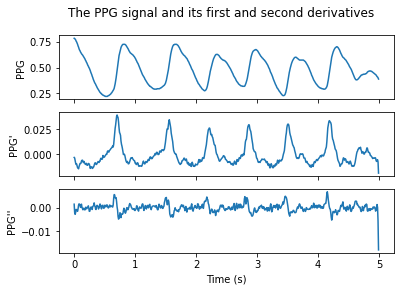

In [141]:
t = np.arange(0, len(ppg))/segment_data.fs
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex = True, sharey = False)
ax1.plot(t, ppg)
ax1.set(xlabel = '', ylabel = 'PPG')
plt.suptitle('The PPG signal and its first and second derivatives')
ax2.plot(t, d1ppg)
ax2.set(xlabel = '', ylabel = 'PPG\'')
ax3.plot(t, d2ppg)
ax3.set(xlabel = 'Time (s)', ylabel = 'PPG\'\'')
plt.show()

# Suggestions for future work
I'd suggest we use a similar approach to that used in the Matlab function [PulseAnalyse](https://peterhcharlton.github.io/pulse-analyse/):
- Savitzky-Golay filtering, as described in [this article](https://doi.org/0.1021/ac60214a047).
- The coefficients for using Savitzky-Golay filtering to obtain derivatives are provided in the 'savitzky_golay' function within PulseAnalyse (see line 2294 [here](https://github.com/peterhcharlton/pulse-analyse/blob/master/pulse-analyse_v.1.3beta/PulseAnalyse.m)).